***
***
***

<br><h2>Session 10 | Combining PCA and Clustering</h2>
<br><h3>THE ULTIMATE REVIEW FOR THE FINAL</h3>
<h4>DAT-5303 | Machine Learning</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

***
***
***

<h3>Part I: Conceptual Review</h3><br>
Let's start by reviewing our key unsupervised learning concepts.<br><br>

<strong>Principal Component Analysis</strong><br>
Focuses on the variance between explanatory variables (i.e. their covariance).<br><br>

Three situations where PCA is useful:
1. Correlated Explanatory Variables (what's going on behind the scenes of the correlation)
2. Dimensionality Reduction (grouping large variable sets into a more manageable number of factors)
3. Latent Trait Exploration (measuring what cannot be measured directly)


<br><br>
<strong>Clustering</strong><br>
Divides observations into groups (i.e. clusters). Observations can be grouped based on their similarities or their differences.

<br>
<h3><u>Don't forget!!!</u></h3>

1. Don't mix data concepts in the same algorithm (spending behavior, demographics, psychometrics, etc.). 
2. Scale your data.
3. Interpretation is subjective, so spend ample time on this step.

<br><br>
<strong>Challenge 1</strong><br>
Complete the code to import the necessary packages for this analysis.

In [1]:
########################################
# importing packages
########################################
import pandas as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering



***
***

<br>
Run the following code to load the dataset and set print options.

In [2]:
########################################
# loading data and setting display options
########################################
# loading data
customers_df = pd.read_excel('top_customers_subset.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

***
***

<br>
<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [3]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

***
***

<br>
<strong>Challenge 2</strong><br>
Drop demographic information and scale the data.

In [4]:
# dropping demographic information
purchase_behavior = customers_df.drop(['Channel','Region'],
                                      axis = 1)


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(purchase_behavior )


# TRANSFORMING our data after fit
X_scaled = scaler.transform(purchase_behavior )


# converting scaled data into a DataFrame
purchases_scaled = pd.DataFrame(X_scaled)


# reattaching column names
purchases_scaled.columns = purchase_behavior.columns

#Why do we put the '\n'
# checking pre- and post-scaling variance
print(pd.np.var(purchase_behavior), '\n\n')
print(pd.np.var(purchases_scaled))

Mediterranean     1.595914e+08
Vegan             5.434617e+07
Vegetarian        9.010485e+07
Middle Eastern    2.351429e+07
Indian            2.268077e+07
Wine              7.934923e+06
dtype: float64 


Mediterranean     1.0
Vegan             1.0
Vegetarian        1.0
Middle Eastern    1.0
Indian            1.0
Wine              1.0
dtype: float64


***
***

<br>

<h3>Part II: Principal Component Analysis</h3>

Our process here is to:
1. Develop a PCA model with no limit to principal components
2. Analyze the <strong>explained_variance_ratio</strong> and the <strong>scree plot</strong>
3. Decide how many components to RETAIN
4. Build a new model with a limited number of principal components
5. Interpret your results (what does each PC represent)

<br>
Remember, there may be some niche opportunities in smaller principal components. Be sure to check this before moving on because this may lead to excellent market opportunities.

<br><br>
<strong>Challenge 3</strong><br>
Develop a PCA object with no limit to principal components and analyze its scree plot.

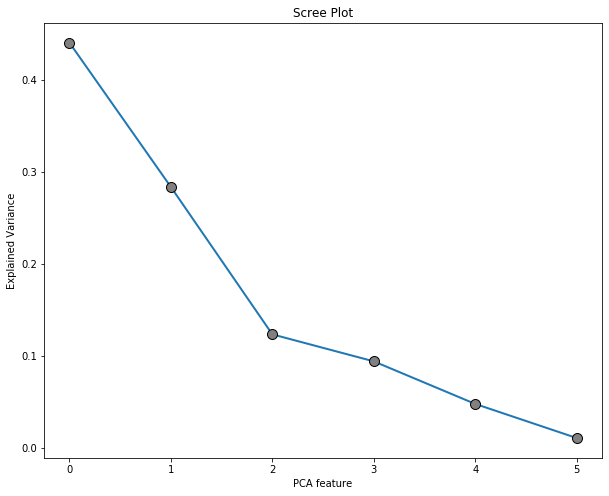

In [5]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components=None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(purchases_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [ ]:
help(pca)

***
***

<br>
<strong>Challenge 4</strong><br>
Reduce the number of principal components to a reasonable number based on the scree plot. Note that we do not need to rerun the scree plot. In this example, we will assume three PCs is a reasonable number based on the elbow in the scree plot. Also note that it would have been reasonable to retain enough PCs so that the cumulative explained variance ratio is greater than or equal to 0.80.

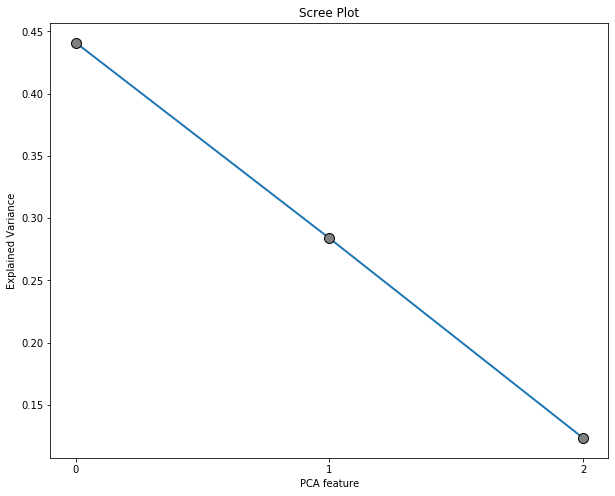

In [6]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components= 3,
          random_state = 802)

# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(purchases_scaled)


# calling the scree_plot function
scree_plot(pca_object= pca_3)

***
***

<br>
<strong>OPTIONAL STEP</strong><br>Run the following code to compare the variance of the unlimited PCA model with the variance of the reduced PCA model. We are doing this in this script simply to show that the explain variance in each principal component does not change after dropping smaller PCs.

In [7]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(purchases_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(purchases_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                   0     1     2     3     4     5
Mediterranean   0.04  0.53 -0.81 -0.24 -0.05 -0.04
Vegan           0.55  0.08  0.06 -0.09  0.83 -0.04
Vegetarian      0.58 -0.15 -0.11  0.11 -0.31  0.72
Middle Eastern  0.05  0.61  0.18  0.77 -0.03 -0.02
Indian          0.55 -0.26 -0.14  0.17 -0.34 -0.69
Wine            0.25  0.50  0.52 -0.55 -0.31 -0.08


3 Components Factor Loadings
------------------------------
                   0     1     2
Mediterranean   0.04  0.53 -0.81
Vegan           0.55  0.08  0.06
Vegetarian      0.58 -0.15 -0.11
Middle Eastern  0.05  0.61  0.18
Indian          0.55 -0.26 -0.14
Wine            0.25  0.50  0.52



***
***

<br>
<strong>Challenge 5</strong><br>
Name your principal components based on the latent traits they reflect.<br>

In this step, make sure to develop a story behind what each PC name represents. This is an ideal method for bridging the gap between the technical and non-technical people you are working with. Remember, by doing a good job here you are putting analytics at the forefront of strategic decision making, which is a great way to boost your value within an organization.

In [8]:
# naming each principal component
factor_loadings_3.columns= ['Herbivores',
                           'Fancy Diners',
                           'Winers']


# checking the result
factor_loadings_3.round(2)

,Herbivores,Fancy Diners,Winers
Mediterranean,0.04,0.53,-0.81
Vegan,0.55,0.08,0.06
Vegetarian,0.58,-0.15,-0.11
Middle Eastern,0.05,0.61,0.18
Indian,0.55,-0.26,-0.14
Wine,0.25,0.50,0.52


***
***

<br>
<strong>Challenge 6</strong><br>
Analyze the factor loadings for each customer in the dataset. Do this by identifying groups of customers that have very high or very low factor loadings in any given principal component. A good heuristic is to look for factor loadings that are greater than one standard deviation from the mean in absolute value. Develop a strategy for key groups that you identify.<br><br>

<strong>Don't forget</strong> to look at both the positive and negative loadings.<br>
<strong>Don't forget</strong> to calculate the percentage of your audience effected by each loading when developing your targeting strategy/new ideas.<br>
<strong>Don't forget</strong> to also consider the proportion of revenue generated by each group.

In [9]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(purchases_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# checking the results
X_pca_reduced

array([[ 0.19329055, -0.30509996, -0.14087845],
       [ 0.4344199 , -0.32841262,  0.31900662],
       [ 0.81114323,  0.8150957 ,  1.52341562],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141],
       [-0.91802273, -0.03004659,  0.25840805],
       [-1.10513709, -0.86133787,  0.30515404]])

***
***

<br><h3>Part III: Clustering</h3><br>
We are going to start by building an agglomerative clustering model. Remember, we are primarily interested in the <strong>dendrogram</strong> and the <strong>inertia plot</strong>. Our goal is to develop an idea as to how many clusters would be appropriate given our analysis of these tools, and then to apply this number of clusters to a k-Means model. Try to come away with 4-5 different numbers of clusters so that you have more options when applying k-Means. <strong>Before getting started, we need to rescale our data.</strong> The reason is that the variance amongst our features is no longer equal.

In [10]:
pd.np.var(X_pca_df)

0    2.644974
1    1.702584
2    0.740065
dtype: float64

***
***

<br>
<strong>Challenge 7</strong><br>
Complete the code to prepare a scaled version of the factor loadings (i.e. principal components) dataset.

In [11]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Herbivores',
                           'Fancy Diners',
                           'Winers']

#Why do we put the '\n'
# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

0    2.644974
1    1.702584
2    0.740065
dtype: float64 


Herbivores      1.0
Fancy Diners    1.0
Winers          1.0
dtype: float64


***
***

<br>
Run the following code to develop a dendrogram. Our goal here is to understand how many clusters to build using k-Means.

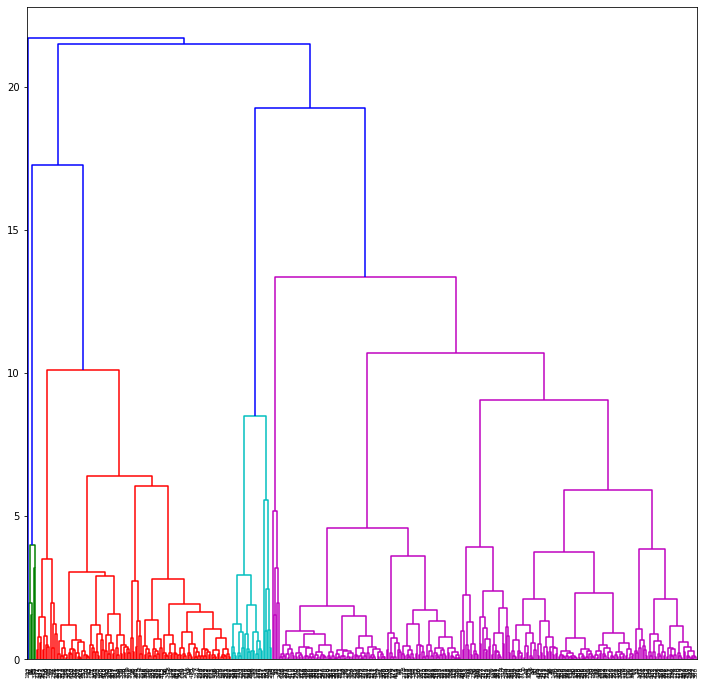

In [12]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

***
***

<br>
<strong>Challenge 8</strong><br>
Develop a code to analyze the inertia plot. Our goal here is to develop more candidates for the number of clusters we might want to develop.

In [ ]:
# calling the inertia_plot() function
interia_plot(data=pca_scaled)

***
***

<br>
<strong>Challenge 9</strong><br>
This is where we test our candidate number of clusters. When we find a clustering that we like, we move forward. For this example, let's assume we converged on a solution of three clusters.<br><br>
<strong>Don't forget</strong> that the appropriate number of clusters does not have to be the same as the number of principal components that were retained.

In [ ]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters = 3,
                        random_state = 802)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

***
***

<br>
<strong>Challenge 10</strong><br>
Finish the code to display the centroids (mean values) for each cluster. Interpret their meaning. This is also a place where you may want to (optionally) name your clusters and develop back stories for ideal members of each group.

In [ ]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Herbivores',
                           'Fancy Diners',
                           'Winers']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

***
***

<br>
<strong>Challenge 11</strong><br>
Complete the code to concatenate channel, region, and PCA components into one DataFrame.

In [ ]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([customers_df.loc[ : , ['Channel', 'Region']],
                                  clst_pca_df],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Channel',
                              'Region',
                              'Cluster',
                              'Herbivores',
                              'Fancy Diners',
                              'Winers']


# checking the results
print(final_pca_clust_df.head(n = 5))

***
***

<br>
Run the following code to add labels to categorical variables. If you (optionally) named your clusters, make sure to label these as well.

In [ ]:
# renaming channels
channel_names = {1 : 'Online',
                 2 : 'Mobile'}


final_pca_clust_df['Channel'].replace(channel_names, inplace = True)



# renaming regions
region_names = {1 : 'Alameda',
                2 : 'San Francisco',
                3 : 'Contra Costa'}


final_pca_clust_df['Region'].replace(region_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

***
***

<br>
<h3>Part IV: Analyze with Demographics</h3><br>
Now that we've completed all of our preparation through machine learning, we can analyze our results with demographics and other data.<br><br>
<strong>Pause before this step</strong> so that you can consider all of the hypotheses and assumptions you have made up to this point. Also consider all of the assumptions your organization is making. For example, if the company is convinced of a particular trend, the following is a good opportunity to validate/negate that information.

In [ ]:
########################
# Channel
########################

# Herbivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Channel',
            y = 'Herbivores',
            hue = 'Cluster',
            data = data_df)

plt.ylim(-10, 19)
plt.tight_layout()
plt.show()



# Fancy Diners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Channel',
            y = 'Fancy Diners',
            hue = 'Cluster',
            data = data_df)

#plt.ylim(-3, 6)
plt.tight_layout()
plt.show()



# Winers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Channel',
            y = 'Winers',
            hue = 'Cluster',
            data = data_df)

#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()



########################
# Region
########################

# Herbivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Herbivores',
            hue = 'Cluster',
            data = data_df)

#plt.ylim(-1, 8)
plt.tight_layout()
plt.show()



# Fancy Diners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Fancy Diners',
            hue = 'Cluster',
            data = data_df)

#plt.ylim(-3, 5)
plt.tight_layout()
plt.show()



# Winers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Winers',
            hue = 'Cluster',
            data = data_df)

#plt.ylim(-4, 3)
plt.tight_layout()
plt.show()

***
***

<br>

~~~
 __     __                               _        _ _   _ 
 \ \   / /                              | |      (_) | | |
  \ \_/ /__  _   _   _ __ ___   __ _  __| | ___   _| |_| |
   \   / _ \| | | | | '_ ` _ \ / _` |/ _` |/ _ \ | | __| |
    | | (_) | |_| | | | | | | | (_| | (_| |  __/ | | |_|_|
    |_|\___/ \__,_| |_| |_| |_|\__,_|\__,_|\___| |_|\__(_)
                                                          
                                                          
~~~